In [1]:
from module.ms_module import MS
from preprocess.ms_preprocess import MSIPreprocessor
from module.ms_data_manager_imzml import MSDataManagerImzML
from tools.plot import plot_spectrum
from logger import get_logger

logger = get_logger("example")

INFO:     25-11-12 20:54 103 ms_data_manager_imzml - Extracting metadata...
INFO:     25-11-12 20:54 114 ms_data_manager_imzml - Metadata extraction completed.
INFO:     25-11-12 20:54 80 ms_data_manager_imzml - Loading data from data/example.imzML...
INFO:     25-11-12 20:54 202 ms_data_manager - creating ms mask.
INFO:     25-11-12 20:54 24 tools.plot - Plotting spectrum with plot_mode=line, mz_range=None, intensity_range=None, metrics_box=True, title_suffix=None, overlay=False


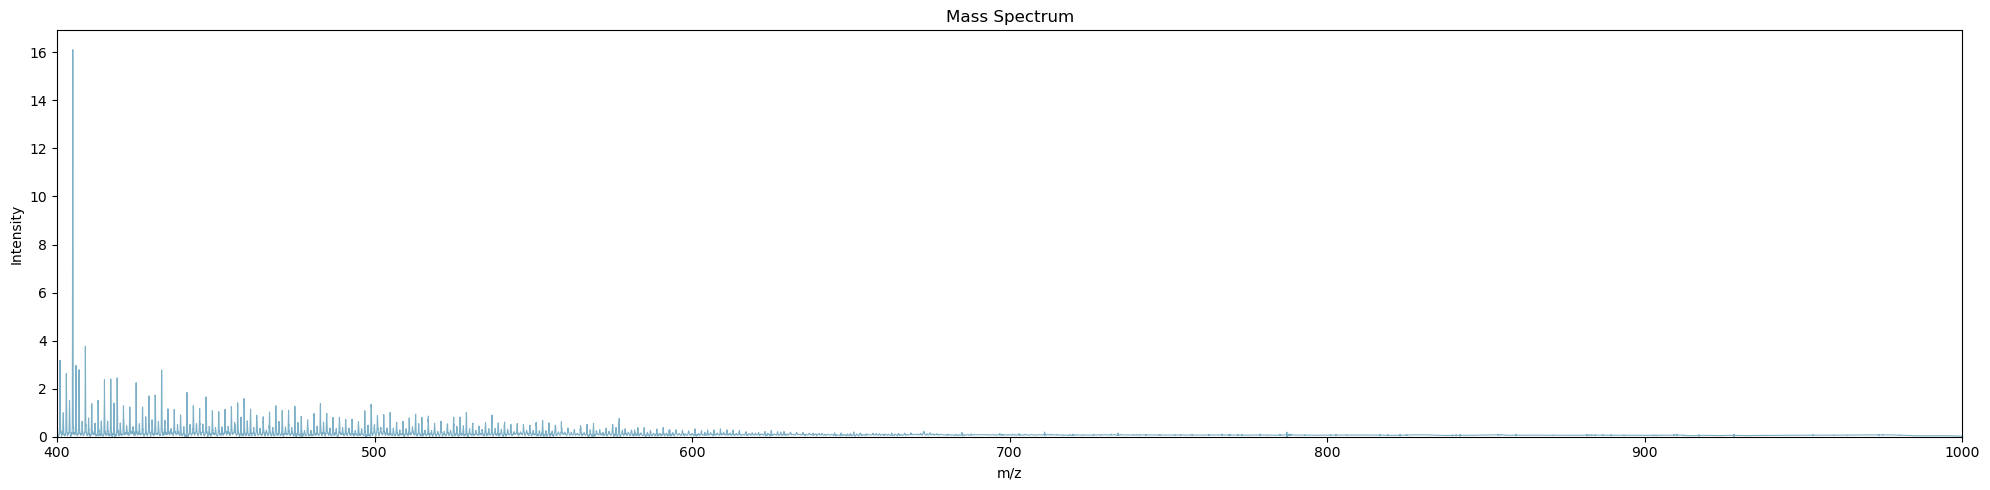

In [2]:
# Run examples when executing this file directly
if __name__ == "__main__":
    FILE_PATH = "data/example.imzML"
    ms = MS()
    ms_md = MSDataManagerImzML(ms, filepath=FILE_PATH)
    ms_md.load_full_data_from_file()
    sp = ms[0]

    denoised = MSIPreprocessor.noise_reduction_spectrum(
        data=sp,
        method="wavelet",
        window=10,
    )
    plot_spectrum(denoised)

INFO:     25-11-12 20:55 24 tools.plot - Plotting spectrum with plot_mode=line, mz_range=(500.0, 510.0), intensity_range=(0, 1.2), metrics_box=True, title_suffix=savgol, overlay=False
INFO:     25-11-12 20:55 321 ms_preprocess - SNR: signal_level:0.6641188859939575, noise:0.027098538637316455
INFO:     25-11-12 20:55 321 ms_preprocess - SNR: signal_level:0.5838738594489141, noise:4.163336342344337e-17
INFO:     25-11-12 20:55 106 tools.plot - Range: 500.0000 - 509.9936
                                          Correlation: 0.9480
                                          TIC ratio: 0.986
                                          SNR orig: 24.5
                                          SNR den: 14024181844509350.0
                                          SNR improvement: 572239160163932.38x


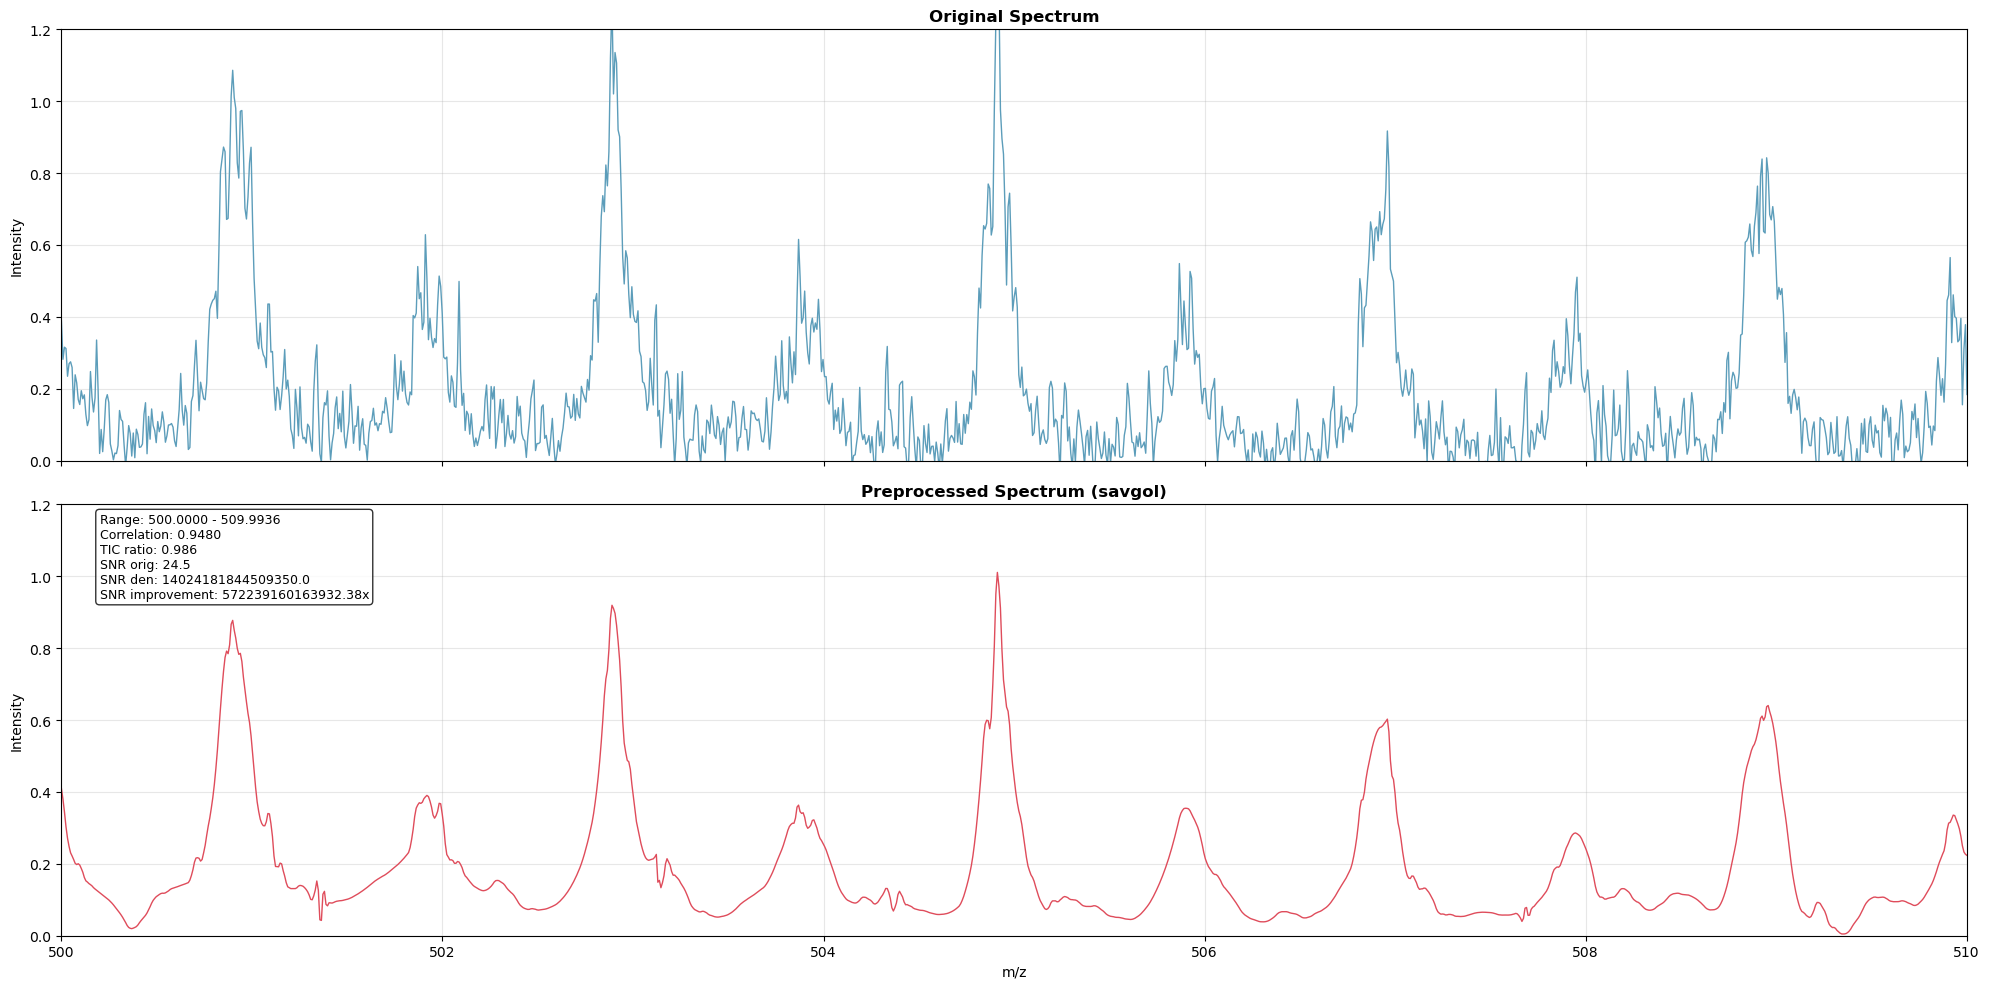

INFO:     25-11-12 20:55 321 ms_preprocess - SNR: signal_level:0.32792559162268237, noise:2.7755575615628914e-17
1.1814764577897294e+16


In [3]:
# Plotting
plot_spectrum(
    base=sp,
    target=denoised,
    mz_range=(500.0, 510.0),
    intensity_range=(0, 1.2),
    title_suffix='savgol',
    overlay=False,
)
print(MSIPreprocessor.calculate_snr_spectrum(spectrum=denoised))
